In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import pandas as pd
import numpy as np

C:\Users\Clayton\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Clayton\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


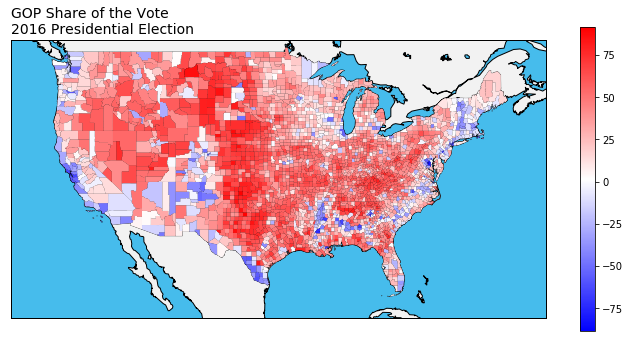

In [17]:
fig, ax = plt.subplots(figsize=(12, 14))

m = Basemap(resolution='l', 
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-130, llcrnrlat=22, 
            urcrnrlon=-62, urcrnrlat=50)
            
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()


m.readshapefile(r'C:\Users\Clayton\Documents\Python Scripts\\' + 
                r'cb_2016_us_county_5m\cb_2016_us_county_5m', 
                'counties')

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.counties],
        'state': [area['STATEFP'] for area in m.counties_info],
        'county' : [area['COUNTYFP'] for area in m.counties_info]
    })

df_poly['combined_fips'] = df_poly['state'] + df_poly['county']

results = pd.read_csv(r'C:\Users\Clayton\Documents\\' + 
                      r'2016_US_County_Level_Presidential_Results.csv', 
                      dtype={'combined_fips' : str})

results['combined_fips'] = results['combined_fips'].apply(
    lambda x: '0' + x if len(x) <= 4 else x)

df_poly = df_poly.merge(results, on='combined_fips', how='left')
df_poly['margin'] = 100*(df_poly['per_gop'] - df_poly['per_dem'])

cmap = plt.get_cmap('bwr')
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['margin'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['margin'])
plt.colorbar(mapper, shrink=0.4)

plt.title('GOP Share of the Vote \n2016 Presidential Election', 
          loc='left', fontsize=14)
plt.show()